In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import helper as t
pd.options.mode.chained_assignment = None  # default='warn'

from IPython import display
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

pd.set_option('display.max_columns',85)
pd.set_option('display.max_rows',154)

df = pd.read_csv('./listings.csv')
reviews = pd.read_csv('./reviews.csv')
metadata = pd.read_csv('./listing_metadata.csv')

In [391]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,...,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,...,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,...,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 

In [392]:
metadata

,Unnamed: 0,Label,Data Type,Description,ML,Reason
0,0,id,Numeric,"id is the primary key of table listings, the f...",0,NaN
1,1,listing_url,URL,listing url,0,The listing_url may has an impact on price pre...
2,2,scrape_id,Numeric,scrape id,0,NaN
3,3,last_scraped,Datetime,last scraped date,0,NaN
4,4,name,String,listing name,0,NaN
5,5,summary,String,summary of listing,0,NaN
6,6,space,String,description of listing space,0,NaN
7,7,description,String,description of listing,0,NaN
8,8,experiences_offered,Categorical,if experiences offered,0,All none
9,9,neighborhood_overview,String,overview of the neighborhood,0,The neighborhood_overview may has an impact on...


#### https://www.kaggle.com/airbnb/seattle

In [393]:
df1 = df[['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month','price']]

In [394]:
df1.describe()

,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,3818.000000,3802.000000,3812.000000,3817.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3191.000000
mean,3.349398,1.259469,1.307712,1.735394,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.078919
std,1.977599,0.590369,0.883395,1.139480,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,1.822348
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.020000
25%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.695000
50%,3.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.540000
75%,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,3.000000
max,16.000000,8.000000,7.000000,15.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,12.150000


In [395]:
df1['price']

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [396]:
df1.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'amenities', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'reviews_per_month', 'price'],
      dtype='object')

In [397]:
rdict = {"within an hour":100,"within a few hours":50,"within a day":35,"a few days or more":2
        }
def price_to_float(p):
    return float(p.replace("$","").replace(",",""))

def rate_to_float(r):
    result = str(r).replace('%',"")
    return float(result)

In [398]:
df1['price'] = df1['price'].apply(price_to_float)

In [399]:
df1['response_rate'] = df1['host_response_rate'].apply(rate_to_float)

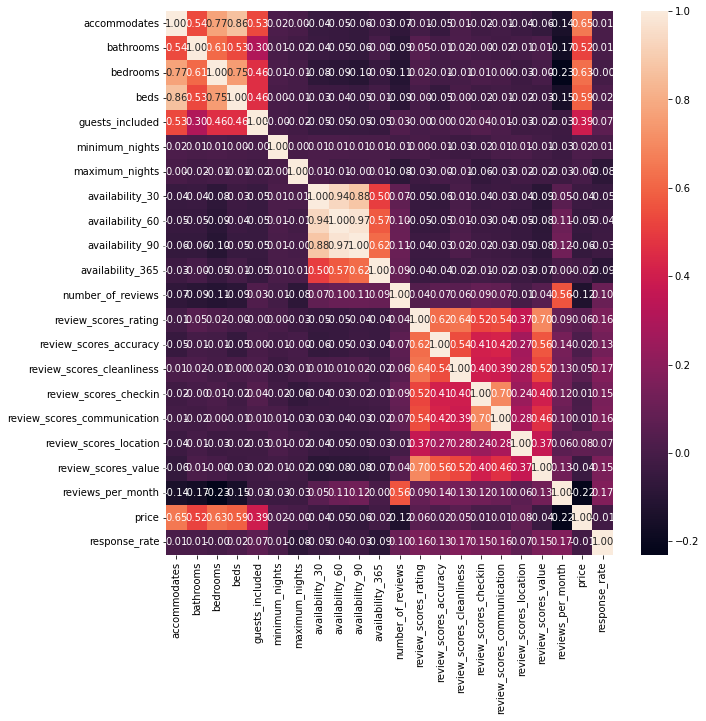

In [400]:
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(method='pearson'),annot=True,fmt='.2f')
plt.show()

In [401]:
def summarize_data(df):
    '''
    INPUT 
        df - a dataframe holding the Amenities column
        
    OUTPUT
        study_df - a dataframe with the amenities count
    '''
    study = df['amenities'].value_counts().reset_index()
    study.rename(columns={'index': 'method', 'amenities': 'count'}, inplace=True)
    study_df = t.total_count(study, 'method', 'count', all_amenities)

    study_df.set_index('method', inplace=True)
    props_study_df = study_df/study_df.sum()
    return props_study_df
    
amenities_df = summarize_data(df1)

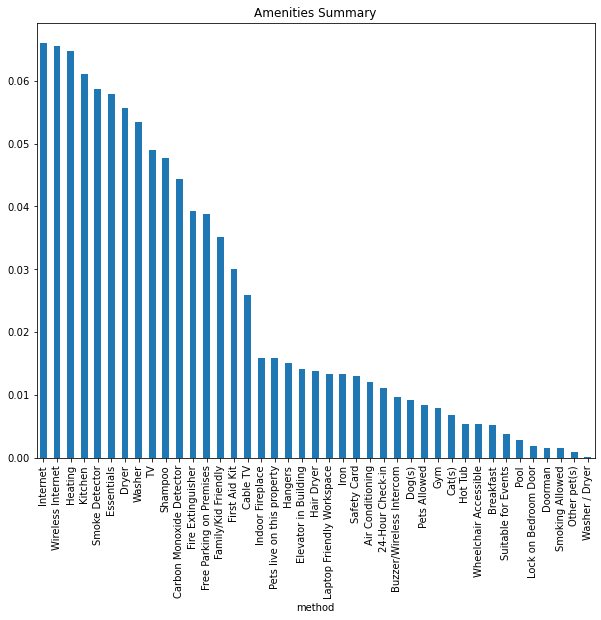

In [402]:
amenities_df.plot(kind='bar', figsize=(10,8),legend=None);
plt.title('Amenities Summary');
plt.show()
    

In [403]:
def get_all(amenities):
    result = []
    for i in amenities:
        result.append(i)
    return result

def clean(x):
    x = x.replace('"','').replace("{",'').replace("}","")
    y = [word for word in x.split(',')]
    return y

def process(amenities,df):
    for i in amenities.split(','):
        df[i] = 1
    return True

        
    

In [404]:
df1['amenities'] = df1['amenities'].apply(clean)

In [405]:
all_amenities_list = list(df1['amenities'].apply(get_all))

In [406]:
def parse_result(r):
    amenities_list = []
    for i in r:
        for j in i:
            if j:
                amenities_list.append(j)
    return list(set(amenities_list))
            

In [407]:
all_possible = parse_result(all_amenities_list)

In [408]:
all_possible


['Wireless Internet',
 'Pets live on this property',
 'Hot Tub',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'Air Conditioning',
 'Breakfast',
 'Lock on Bedroom Door',
 'First Aid Kit',
 'Dryer',
 'Pool',
 'Shampoo',
 'Cat(s)',
 'Suitable for Events',
 'Indoor Fireplace',
 'Hangers',
 'Laptop Friendly Workspace',
 '24-Hour Check-in',
 'Washer',
 'Smoke Detector',
 'Washer / Dryer',
 'Elevator in Building',
 'Iron',
 'Wheelchair Accessible',
 'Smoking Allowed',
 'Cable TV',
 'Buzzer/Wireless Intercom',
 'Essentials',
 'TV',
 'Dog(s)',
 'Hair Dryer',
 'Pets Allowed',
 'Internet',
 'Doorman',
 'Carbon Monoxide Detector',
 'Free Parking on Premises',
 'Other pet(s)',
 'Heating',
 'Safety Card',
 'Kitchen',
 'Gym']

In [409]:
df2 = df1[['price','amenities']]

In [410]:
df3 = df2.join(df2.pop('amenities').str.join('|').str.get_dummies())

In [411]:
df3


,price,24-Hour Check-in,Air Conditioning,Breakfast,Buzzer/Wireless Intercom,Cable TV,Carbon Monoxide Detector,Cat(s),Dog(s),Doorman,Dryer,Elevator in Building,Essentials,Family/Kid Friendly,Fire Extinguisher,First Aid Kit,Free Parking on Premises,Gym,Hair Dryer,Hangers,Heating,Hot Tub,Indoor Fireplace,Internet,Iron,Kitchen,Laptop Friendly Workspace,Lock on Bedroom Door,Other pet(s),Pets Allowed,Pets live on this property,Pool,Safety Card,Shampoo,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer / Dryer,Wheelchair Accessible,Wireless Internet
0,85.0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
1,150.0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1
2,975.0,0,1,0,0,1,1,1,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1
3,100.0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1
4,450.0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1
3814,79.0,1,0,0,0,1,0,0,0,0,0,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1
3815,93.0,0,0,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1
3816,99.0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1


In [414]:
corr = df3.corr(method='pearson')

In [425]:
corr.drop(labels='price',axis=0,inplace=True)


<AxesSubplot:>

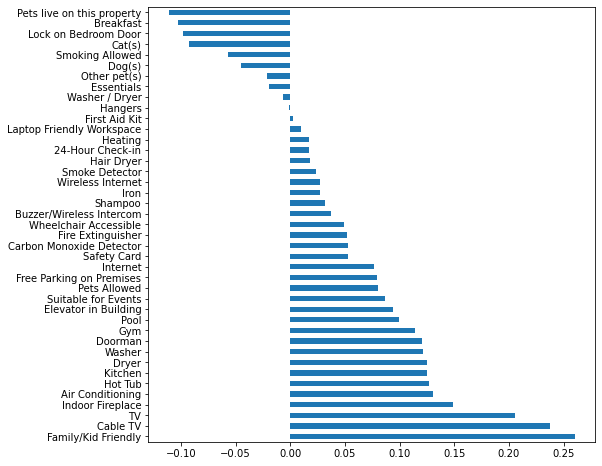

In [426]:
corr['price'].sort_values(ascending=False).plot(kind='barh',figsize=(8,8))